In [12]:
import polars as pl
import numpy as np

In [13]:
!pwd

/workspaces/ml-zoomcamp-2024/car_price_prediction/notebooks


In [14]:
df = pl.read_csv("../data/raw/data.csv")

In [15]:
df.head()

Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
str,str,i64,str,i64,i64,str,str,i64,str,str,str,i64,i64,i64,i64
"""BMW""","""1 Series M""",2011,"""premium unleaded (required)""",335,6,"""MANUAL""","""rear wheel drive""",2,"""Factory Tuner,Luxury,High-Perf…","""Compact""","""Coupe""",26,19,3916,46135
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",300,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,Performance""","""Compact""","""Convertible""",28,19,3916,40650
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",300,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,High-Performance""","""Compact""","""Coupe""",28,20,3916,36350
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",230,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,Performance""","""Compact""","""Coupe""",28,18,3916,29450
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",230,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury""","""Compact""","""Convertible""",28,18,3916,34500


Normalizing the names of the columns

In [16]:
df = df.rename({col: col.lower().replace(" ", "_") for col in df.columns})

In [17]:
list(zip(df.columns, df.dtypes))

[('make', String),
 ('model', String),
 ('year', Int64),
 ('engine_fuel_type', String),
 ('engine_hp', Int64),
 ('engine_cylinders', Int64),
 ('transmission_type', String),
 ('driven_wheels', String),
 ('number_of_doors', Int64),
 ('market_category', String),
 ('vehicle_size', String),
 ('vehicle_style', String),
 ('highway_mpg', Int64),
 ('city_mpg', Int64),
 ('popularity', Int64),
 ('msrp', Int64)]

### Exploratory Data Analysis

In [18]:
columns = df.columns

In [19]:
df.head()

make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
str,str,i64,str,i64,i64,str,str,i64,str,str,str,i64,i64,i64,i64
"""BMW""","""1 Series M""",2011,"""premium unleaded (required)""",335,6,"""MANUAL""","""rear wheel drive""",2,"""Factory Tuner,Luxury,High-Perf…","""Compact""","""Coupe""",26,19,3916,46135
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",300,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,Performance""","""Compact""","""Convertible""",28,19,3916,40650
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",300,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,High-Performance""","""Compact""","""Coupe""",28,20,3916,36350
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",230,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury,Performance""","""Compact""","""Coupe""",28,18,3916,29450
"""BMW""","""1 Series""",2011,"""premium unleaded (required)""",230,6,"""MANUAL""","""rear wheel drive""",2,"""Luxury""","""Compact""","""Convertible""",28,18,3916,34500


In [20]:
for column in df.columns:
    print(column)
    print(df[column].unique()[:5].to_list())
    print(df[column].n_unique())
    print("")

make
['Tesla', 'Lamborghini', 'BMW', 'Buick', 'Lotus']
48

model
['LS', '599', 'Elantra', '8 Series', 'Element']
915

year
[1990, 1991, 1992, 1993, 1994]
28

engine_fuel_type
['flex-fuel (unleaded/natural gas)', 'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)', 'electric', 'flex-fuel (premium unleaded required/E85)']
11

engine_hp
[None, 55, 62, 63, 66]
357

engine_cylinders
[None, 0, 3, 4, 5]
10

transmission_type
['UNKNOWN', 'AUTOMATED_MANUAL', 'AUTOMATIC', 'DIRECT_DRIVE', 'MANUAL']
5

driven_wheels
['all wheel drive', 'front wheel drive', 'rear wheel drive', 'four wheel drive']
4

number_of_doors
[None, 2, 3, 4]
4

market_category
['Crossover,Exotic,Luxury,High-Performance', 'Performance', 'Flex Fuel', 'Hatchback,Factory Tuner,Luxury,Performance', 'Diesel']
72

vehicle_size
['Large', 'Compact', 'Midsize']
3

vehicle_style
['2dr SUV', 'Convertible SUV', 'Regular Cab Pickup', 'Passenger Minivan', '4dr Hatchback']
16

highway_mpg
[12, 13, 14, 15, 16]
59

city_mpg
[7, 8, 9, 

### Exploratory Data Analysis

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt

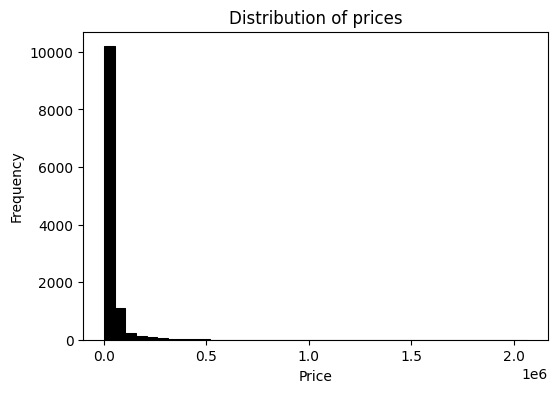

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(df['msrp'], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

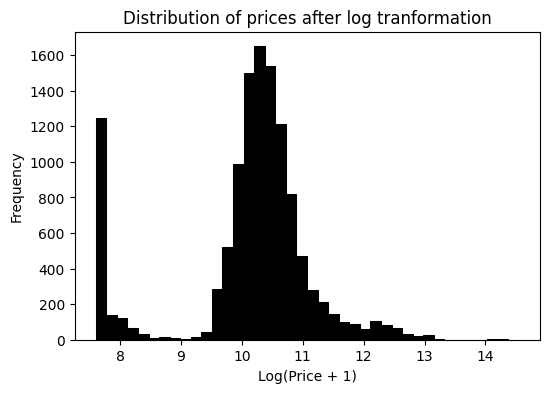

In [24]:
log_price = np.log1p(df['msrp'])

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

Checking for missing values

In [29]:
df.null_count()

make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,3,69,30,0,0,6,0,0,0,0,0,0,0
